In [368]:
!pip install mlrose-hiive
%load_ext autoreload
%autoreload 2

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
mlr_data = '/tf/data/mlrose/'
mlr_src = '../'
!ls $mlr_src
!ls $mlr_data

Constants.py   Graph.py   __pycache__  kcolors	  nqueens
Experiment.py  README.md  jupyter      notes.txt  tsp
__pycache__  kcolors  nqueens


In [853]:

import mlrose_hiive
import numpy as np
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
import sys
import os


sys.path.insert(0, mlr_src)
from Graph import *
from Experiment import *

In [346]:
'''
███╗░░██╗  ░██████╗░██╗░░░██╗███████╗███████╗███╗░░██╗░██████╗
████╗░██║  ██╔═══██╗██║░░░██║██╔════╝██╔════╝████╗░██║██╔════╝
██╔██╗██║  ██║██╗██║██║░░░██║█████╗░░█████╗░░██╔██╗██║╚█████╗░
██║╚████║  ╚██████╔╝██║░░░██║██╔══╝░░██╔══╝░░██║╚████║░╚═══██╗
██║░╚███║  ░╚═██╔═╝░╚██████╔╝███████╗███████╗██║░╚███║██████╔╝
╚═╝░░╚══╝  ░░░╚═╝░░░░╚═════╝░╚══════╝╚══════╝╚═╝░░╚══╝╚═════╝░
'''

!ls $mlr_src/nqueens
!ls $mlr_data/nqueens
exp = 'nqueens'

__pycache__  run.py
pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p


sa_q8_schgeom_m100|best_fit:0.0|best_it:234|time_to_best:0.03934|fevals_to_best:285.0|fevals:285.0
sa_q12_schgeom_m100|best_fit:0.0|best_it:490|time_to_best:0.13644|fevals_to_best:557.0|fevals:557.0
sa_q16_schgeom_m100|best_fit:1.0|best_it:374|time_to_best:0.25091|fevals_to_best:444.0|fevals:615.0
sa_q20_schgeom_m100|best_fit:1.0|best_it:490|time_to_best:0.55646|fevals_to_best:573.0|fevals:673.0
sa_q24_schgeom_m100|best_fit:2.0|best_it:925|time_to_best:0.94115|fevals_to_best:1050.0|fevals:1618.0


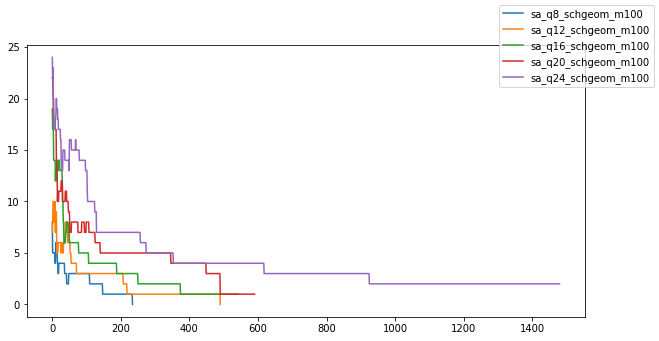

In [347]:
sa = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_sa.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('q',8))
# s.filters.append(TagFilter('sch','arith','ne'))
s.filters.append(TagFilter('sch','geom'))
# s.filters.append(TagFilter('pop', 200))
# s.filters.append(TagFilter('mut',0.3))
# s.filters.append(TagFilter('minelite',1))
# s.filters.append(ConvergeFilter())

graph_generate_single(sa, search=s)
table_summary_single(sa, search=s)
# s2 = Search()
# s2.filters.append(TagFilter('q',8))
# graph_generate_single(sa, search=s2)

ga_q8_pop300_m100_mut0.1|best_fit:0.0|best_it:18|time_to_best:0.66686|fevals_to_best:6022.0|fevals:6022.0
ga_q12_pop300_m100_mut0.1|best_fit:0.0|best_it:55|time_to_best:3.09494|fevals_to_best:17162.0|fevals:17162.0
ga_q16_pop300_m100_mut0.1|best_fit:1.0|best_it:48|time_to_best:3.27402|fevals_to_best:15055.0|fevals:45155.0
ga_q20_pop300_m100_mut0.1|best_fit:1.0|best_it:73|time_to_best:5.57042|fevals_to_best:22582.0|fevals:52682.0
ga_q24_pop300_m100_mut0.1|best_fit:0.0|best_it:96|time_to_best:6.63834|fevals_to_best:29509.0|fevals:29509.0


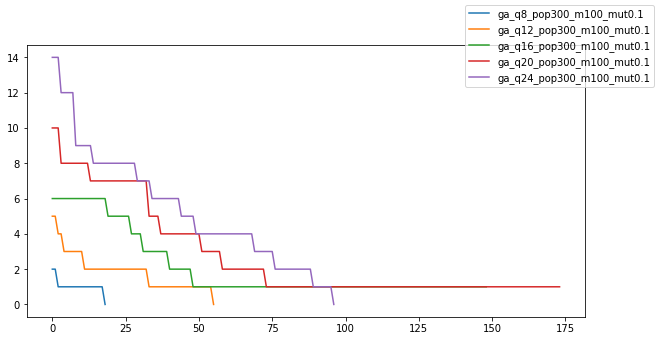

In [351]:
ga = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_ga.p'))
#graph it. 
pop = 300
mut = .1
s = Search()
# s.filters.append(TagFilter('q',24))

s.filters.append(TagFilter('pop', pop))
s.filters.append(TagFilter('mut',mut))
# s.filters.append(TagFilter('minelite',0))
# s.filters.append(ConvergeFilter())
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)

mim_q8_pop100_m100_kp0.2|best_fit:1.0|best_it:2|time_to_best:0.06886|fevals_to_best:406.0|fevals:10506.0
mim_q8_pop200_m100_kp0.2|best_fit:1.0|best_it:2|time_to_best:0.0869|fevals_to_best:805.0|fevals:20905.0
mim_q8_pop300_m100_kp0.2|best_fit:1.0|best_it:2|time_to_best:0.10292|fevals_to_best:1205.0|fevals:31305.0
mim_q12_pop100_m100_kp0.2|best_fit:3.0|best_it:3|time_to_best:0.14396|fevals_to_best:506.0|fevals:10606.0
mim_q12_pop200_m100_kp0.2|best_fit:3.0|best_it:5|time_to_best:0.31268|fevals_to_best:1409.0|fevals:21509.0
mim_q12_pop300_m100_kp0.2|best_fit:3.0|best_it:1|time_to_best:0.07642|fevals_to_best:904.0|fevals:31004.0
mim_q16_pop100_m100_kp0.2|best_fit:6.0|best_it:1|time_to_best:0.06816|fevals_to_best:304.0|fevals:10404.0
mim_q16_pop200_m100_kp0.2|best_fit:4.0|best_it:4|time_to_best:0.36662|fevals_to_best:1208.0|fevals:21308.0
mim_q16_pop300_m100_kp0.2|best_fit:5.0|best_it:6|time_to_best:0.64475|fevals_to_best:2409.0|fevals:32509.0
mim_q20_pop100_m100_kp0.2|best_fit:8.0|best_it

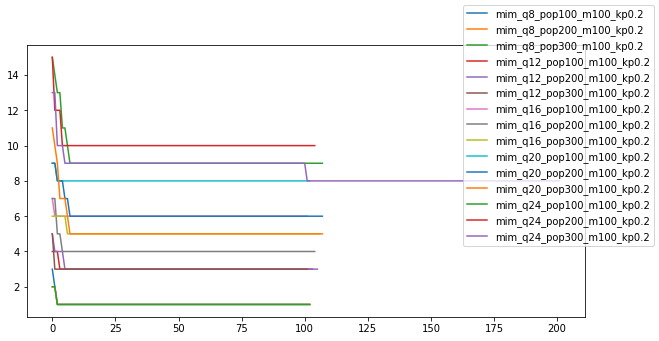

In [329]:
mim = Experiment.pickle_load(os.path.join(mlr_data, 'nqueens','pickle_mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('q',24))
# s.filters.append(TagFilter('pop', 800))
s.filters.append(TagFilter('kp',0.2))
# s.filters.append(ConvergeFilter())
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)

rhc_q8_r1_m100|best_fit:1.0|best_it:9|time_to_best:0.0022|fevals_to_best:16.0|fevals:116.0
rhc_q8_r2_m100|best_fit:1.0|best_it:9|time_to_best:0.00355|fevals_to_best:16.0|fevals:116.0
rhc_q8_r5_m100|best_fit:1.0|best_it:9|time_to_best:0.02625|fevals_to_best:16.0|fevals:116.0
rhc_q8_r10_m100|best_fit:0.0|best_it:95|time_to_best:0.50662|fevals_to_best:1516.0|fevals:1516.0
rhc_q8_r20_m100|best_fit:0.0|best_it:95|time_to_best:0.50062|fevals_to_best:1516.0|fevals:1516.0
rhc_q12_r1_m100|best_fit:3.0|best_it:119|time_to_best:0.03504|fevals_to_best:124.0|fevals:224.0
rhc_q12_r2_m100|best_fit:2.0|best_it:115|time_to_best:0.06804|fevals_to_best:622.0|fevals:722.0
rhc_q12_r5_m100|best_fit:2.0|best_it:115|time_to_best:0.25547|fevals_to_best:622.0|fevals:722.0
rhc_q12_r10_m100|best_fit:2.0|best_it:115|time_to_best:0.56798|fevals_to_best:622.0|fevals:722.0
rhc_q16_r1_m100|best_fit:2.0|best_it:237|time_to_best:0.0723|fevals_to_best:250.0|fevals:350.0
rhc_q16_r2_m100|best_fit:2.0|best_it:237|time_to_be

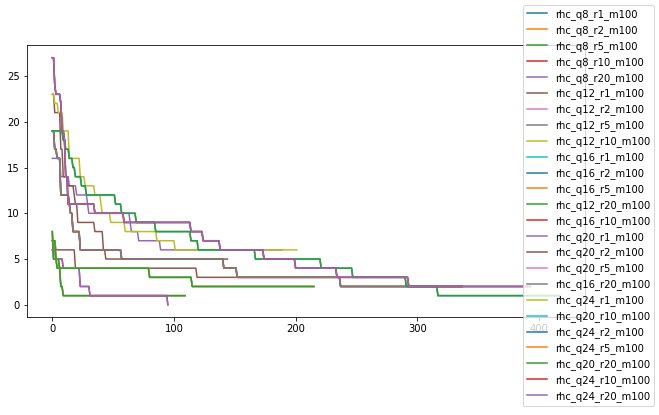

In [331]:
rhc = Experiment.pickle_load(os.path.join(mlr_data, 'nqueens','pickle_rhc.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('q',24))
# s.filters.append(ConvergeFilter


graph_generate_single(rhc, search=s)
table_summary_single(rhc, search=s)

In [25]:
'''
██╗░░██╗  ░█████╗░░█████╗░██╗░░░░░░█████╗░██████╗░
██║░██╔╝  ██╔══██╗██╔══██╗██║░░░░░██╔══██╗██╔══██╗
█████═╝░  ██║░░╚═╝██║░░██║██║░░░░░██║░░██║██████╔╝
██╔═██╗░  ██║░░██╗██║░░██║██║░░░░░██║░░██║██╔══██╗
██║░╚██╗  ╚█████╔╝╚█████╔╝███████╗╚█████╔╝██║░░██║
╚═╝░░╚═╝  ░╚════╝░░╚════╝░╚══════╝░╚════╝░╚═╝░░╚═╝
'''

!ls $mlr_src/kcolors
!ls $mlr_data/kcolors

__pycache__  run.py
pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p


sa_n20_c2_schgeom_m100|best_fit:2.0|best_it:110|time_to_best:0.02004|fevals_to_best:148.0|fevals:248.0
sa_n80_c4_schgeom_m100|best_fit:9.0|best_it:2382|time_to_best:1.29943|fevals_to_best:2657.0|fevals:3731.0
sa_n40_c4_schgeom_m100|best_fit:5.0|best_it:302|time_to_best:0.34218|fevals_to_best:392.0|fevals:10772.0


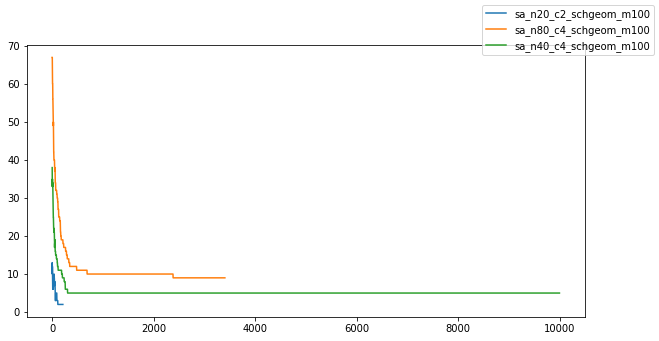

In [257]:
sa = Experiment.pickle_load(os.path.join(mlr_data, 'kcolors','pickle_sa.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('n',80))
s.filters.append(TagFilter('sch','geom'))
graph_generate_single(sa, search=s)
table_summary_single(sa, search=s)

ga_n20_c2_pop400_m100_mut0.1_minelite0|best_fit:2.0|best_it:14|time_to_best:0.33943|fevals_to_best:6420.0|fevals:46520.0
ga_n40_c4_pop400_m100_mut0.1_minelite0|best_fit:4.0|best_it:56|time_to_best:1.85399|fevals_to_best:23272.0|fevals:63372.0
ga_n80_c4_pop400_m100_mut0.1_minelite0|best_fit:10.0|best_it:87|time_to_best:4.2169|fevals_to_best:35710.0|fevals:75810.0


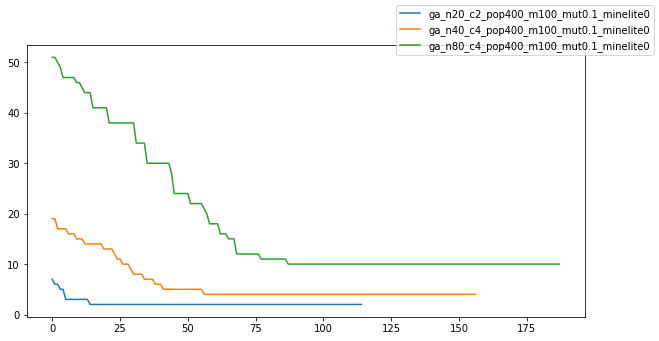

In [267]:
ga = Experiment.pickle_load(os.path.join(mlr_data, 'kcolors','pickle_ga.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('n',80))
s.filters.append(TagFilter('minelite',0))
s.filters.append(TagFilter('pop',400))
s.filters.append(TagFilter('mut',0.1))
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)

mim_n20_c2_pop1600_m10_kp0.3|best_fit:2.0|best_it:1|time_to_best:0.1239|fevals_to_best:4804.0|fevals:20814.0
mim_n20_c2_pop3200_m10_kp0.3|best_fit:2.0|best_it:1|time_to_best:0.2102|fevals_to_best:9604.0|fevals:41614.0
mim_n40_c4_pop1600_m10_kp0.3|best_fit:1.0|best_it:19|time_to_best:9.1942|fevals_to_best:33631.0|fevals:49641.0
mim_n40_c4_pop3200_m10_kp0.3|best_fit:3.0|best_it:14|time_to_best:8.69699|fevals_to_best:51222.0|fevals:83232.0
mim_n80_c4_pop1600_m10_kp0.3|best_fit:9.0|best_it:27|time_to_best:37.6231|fevals_to_best:46444.0|fevals:62454.0
mim_n80_c4_pop3200_m10_kp0.3|best_fit:8.0|best_it:25|time_to_best:40.36411|fevals_to_best:86441.0|fevals:118451.0


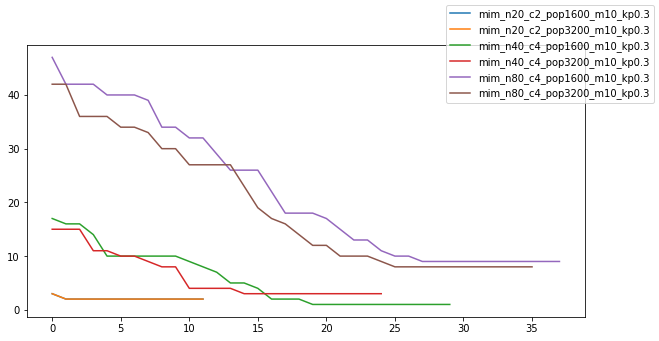

In [278]:
mim = Experiment.pickle_load(os.path.join(mlr_data, 'kcolors','pickle_mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('n',40))
# s.filters.append(TagFilter('pop',800))
s.filters.append(TagFilter('kp',.3))
# s.filters.append(ConvergeFilter())
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)

rhc_n80_c6_r1_m1000|best_fit:0.0|best_it:919|time_to_best:1.15332|fevals_to_best:2649.0|fevals:3649.0
rhc_n80_c6_r2_m1000|best_fit:0.0|best_it:919|time_to_best:0.97245|fevals_to_best:2649.0|fevals:3649.0
rhc_n80_c6_r5_m1000|best_fit:0.0|best_it:919|time_to_best:1.00079|fevals_to_best:2649.0|fevals:3649.0
rhc_n80_c6_r10_m1000|best_fit:0.0|best_it:919|time_to_best:1.01048|fevals_to_best:2649.0|fevals:3649.0
rhc_n80_c6_r20_m1000|best_fit:0.0|best_it:919|time_to_best:0.78223|fevals_to_best:2649.0|fevals:3649.0


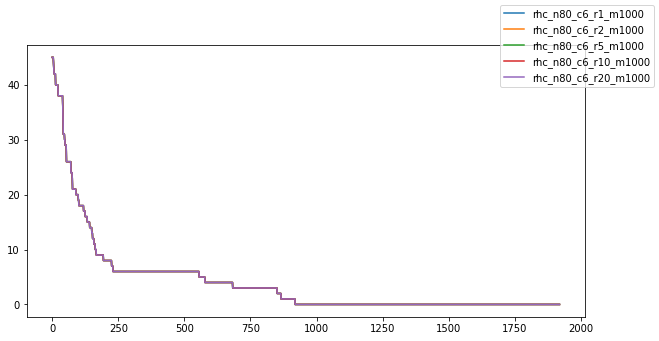

In [256]:
rhc = Experiment.pickle_load(os.path.join(mlr_data, 'kcolors','pickle_rhc.p'))
#graph it. 
s = Search()
s.filters.append(TagFilter('n',80))
s.filters.append(ConvergeFilter())
graph_generate_single(rhc, search=s)
table_summary_single(rhc, search=s)

In [392]:
'''
░█████╗░███╗░░██╗███████╗  ███╗░░░███╗░█████╗░██╗░░██╗
██╔══██╗████╗░██║██╔════╝  ████╗░████║██╔══██╗╚██╗██╔╝
██║░░██║██╔██╗██║█████╗░░  ██╔████╔██║███████║░╚███╔╝░
██║░░██║██║╚████║██╔══╝░░  ██║╚██╔╝██║██╔══██║░██╔██╗░
╚█████╔╝██║░╚███║███████╗  ██║░╚═╝░██║██║░░██║██╔╝╚██╗
░╚════╝░╚═╝░░╚══╝╚══════╝  ╚═╝░░░░░╚═╝╚═╝░░╚═╝╚═╝░░╚═╝
'''
!ls $mlr_src/onemax
!ls $mlr_data/onemax
to_chart = {}

__pycache__  run.py
pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p


sa_size32_schexp_m1000|best_fit:32.0|best_it:343|time_to_best:0.03157|fevals_to_best:412.0|fevals:412.0
sa_size64_schexp_m1000|best_fit:64.0|best_it:388|time_to_best:0.0387|fevals_to_best:478.0|fevals:478.0
sa_size128_schexp_m1000|best_fit:128.0|best_it:666|time_to_best:0.11355|fevals_to_best:775.0|fevals:775.0
sa_size256_schexp_m1000|best_fit:256.0|best_it:1318|time_to_best:0.37213|fevals_to_best:1497.0|fevals:1497.0
sa_size512_schexp_m1000|best_fit:512.0|best_it:2603|time_to_best:1.37657|fevals_to_best:2911.0|fevals:2911.0
sa_size1024_schexp_m1000|best_fit:1023.0|best_it:5490|time_to_best:8.00192|fevals_to_best:6036.0|fevals:7036.0
sa_size2048_schexp_m1000|best_fit:2039.0|best_it:9956|time_to_best:12.82234|fevals_to_best:11035.0|fevals:11078.0


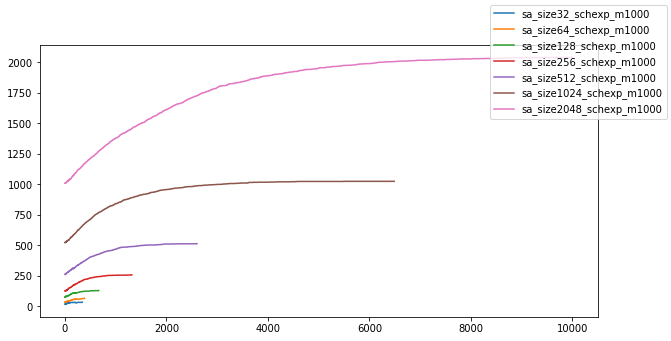

In [558]:
sa = Experiment.pickle_load(os.path.join(mlr_data, 'onemax','pickle_sa.p'))
s = Search()
s.filters.append(TagFilter('sch','exp'))
s.filters.append(TagFilter('m',1000))
graph_generate_single(sa, search=s)
table_summary_single(sa, search=s)

#filter the best performing
best = Search()
best.filters.append(TagFilter('sch','exp'))
best.filters.append(TagFilter('m', 10))
best.filters.append(TagFilter('size',500,'gt'))
to_chart['sa'] = best.findall(sa)


ga_size512_pop100_m100_mut0.2|best_fit:512.0|best_it:261|time_to_best:1.60936|fevals_to_best:26643.0|fevals:26643.0
ga_size1024_pop100_m100_mut0.2|best_fit:1023.0|best_it:636|time_to_best:4.33233|fevals_to_best:64630.0|fevals:74730.0
ga_size2048_pop100_m100_mut0.2|best_fit:2048.0|best_it:1315|time_to_best:7.01313|fevals_to_best:133403.0|fevals:133403.0


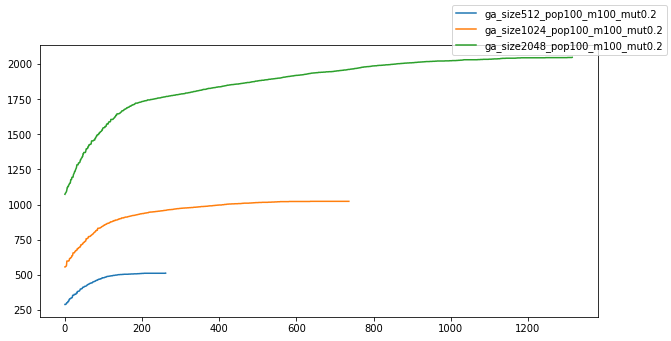

In [556]:
ga = Experiment.pickle_load(os.path.join(mlr_data, 'onemax','pickle_ga.p'))
#graph it. 
s = Search()
s.filters.append(TagFilter('size',500, 'gt'))
s.filters.append(TagFilter('mut',0.2))
s.filters.append(TagFilter('pop',100))
s.filters.append(TagFilter('m',100))
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)

#filter the best performing
best = Search()
best.filters.append(TagFilter('size',256, 'gt'))
best.filters.append(TagFilter('mut',0.2))
best.filters.append(TagFilter('pop',100))
best.filters.append(TagFilter('m',10))
to_chart['ga'] = best.findall(ga)
# print(best.findall(ga))

mim_size32_pop200_m10_kp0.25|best_fit:32.0|best_it:3|time_to_best:0.63262|fevals_to_best:1008.0|fevals:1008.0
mim_size32_pop200_m10_kp0.5|best_fit:32.0|best_it:8|time_to_best:1.75949|fevals_to_best:2015.0|fevals:2015.0
mim_size64_pop200_m10_kp0.25|best_fit:64.0|best_it:7|time_to_best:6.05367|fevals_to_best:1816.0|fevals:1816.0
mim_size64_pop200_m10_kp0.5|best_fit:64.0|best_it:12|time_to_best:10.27882|fevals_to_best:2825.0|fevals:2825.0
mim_size128_pop200_m10_kp0.25|best_fit:128.0|best_it:11|time_to_best:34.74313|fevals_to_best:2624.0|fevals:2624.0
mim_size128_pop200_m10_kp0.5|best_fit:128.0|best_it:20|time_to_best:63.48568|fevals_to_best:4440.0|fevals:4440.0
mim_size256_pop200_m10_kp0.25|best_fit:255.0|best_it:20|time_to_best:230.53264|fevals_to_best:4441.0|fevals:6451.0
mim_size256_pop200_m10_kp0.5|best_fit:256.0|best_it:29|time_to_best:345.68379|fevals_to_best:6258.0|fevals:6258.0
mim_size512_pop200_m10_kp0.25|best_fit:512.0|best_it:27|time_to_best:1191.288|fevals_to_best:5855.0|feva

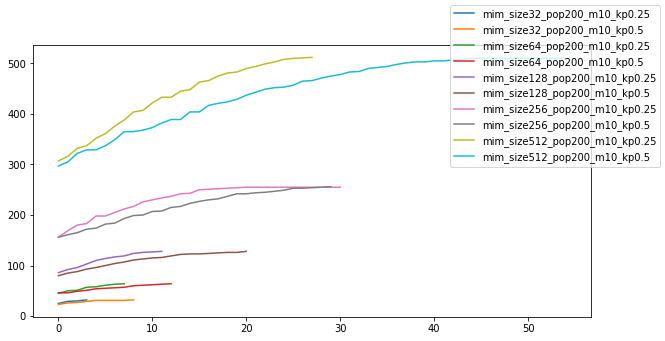

In [538]:
mim = Experiment.pickle_load(os.path.join(mlr_data, 'onemax','pickle_mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',32))
# s.filters.append(TagFilter('pop',100))
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)

best = Search()
best.filters.append(TagFilter('size',256, 'gt'))
best.filters.append(TagFilter('kp',0.25))
best.filters.append(TagFilter('pop',200))
best.filters.append(TagFilter('m',10))
to_chart['mim'] = best.findall(mim)

rhc_size512_r10_m10|best_fit:387.0|best_it:316|time_to_best:0.74504|fevals_to_best:1858.0|fevals:1868.0
rhc_size1024_r10_m10|best_fit:733.0|best_it:544|time_to_best:3.58293|fevals_to_best:4166.0|fevals:4176.0
rhc_size2048_r10_m10|best_fit:1448.0|best_it:1170|time_to_best:4.94428|fevals_to_best:2565.0|fevals:2575.0


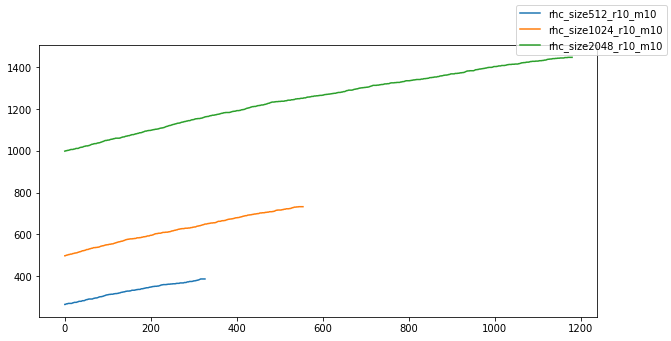

In [560]:
rhc = Experiment.pickle_load(os.path.join(mlr_data, 'onemax','pickle_rhc.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',256))
# s.filters.append(TagFilter('r',20))
s.filters.append(TagFilter('m',10))
s.filters.append(TagFilter('r',10))
s.filters.append(TagFilter('size',256,'gt'))
to_chart['rhc'] = s.findall(rhc)
graph_generate_single(rhc, search=s)
table_summary_single(rhc, search=s)


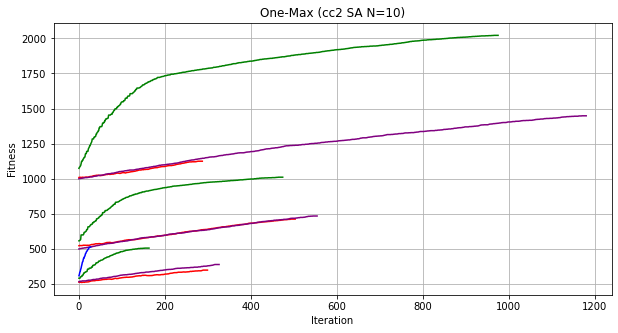

In [561]:

graph_generate_summary(to_chart, 'One-Max (cc2 SA N=10)','Iteration','Fitness')



In [291]:
'''
███████╗░█████╗░██╗░░░██╗██████╗░██████╗░███████╗░█████╗░██╗░░██╗
██╔════╝██╔══██╗██║░░░██║██╔══██╗██╔══██╗██╔════╝██╔══██╗██║░██╔╝
█████╗░░██║░░██║██║░░░██║██████╔╝██████╔╝█████╗░░███████║█████═╝░
██╔══╝░░██║░░██║██║░░░██║██╔══██╗██╔═══╝░██╔══╝░░██╔══██║██╔═██╗░
██║░░░░░╚█████╔╝╚██████╔╝██║░░██║██║░░░░░███████╗██║░░██║██║░╚██╗
╚═╝░░░░░░╚════╝░░╚═════╝░╚═╝░░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝╚═╝░░╚═╝
'''
!ls $mlr_src/4peaks
!ls $mlr_data/4peaks

__pycache__  run.py
pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p


sa_size40_schgeom_m100|best_fit:75.0|best_it:883|time_to_best:0.07979|fevals_to_best:1169.0|fevals:1269.0
sa_size80_schgeom_m100|best_fit:78.0|best_it:2430|time_to_best:0.58817|fevals_to_best:3728.0|fevals:3828.0
sa_size100_schgeom_m100|best_fit:100.0|best_it:3611|time_to_best:1.16622|fevals_to_best:5464.0|fevals:5564.0


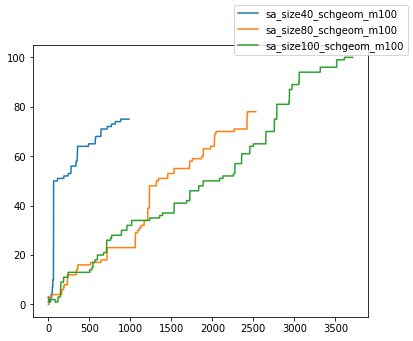

In [855]:
sa = Experiment.pickle_load(os.path.join(mlr_data, '4peaks','pickle_sa.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',100))
s.filters.append(TagFilter('sch','geom'))
graph_generate_single(sa, search=s)
# sa.results
table_summary_single(sa, search=s)


to_chart['sa'] = s.findall(sa)

ga_size40_pop100_m100_mut0.1|best_fit:75.0|best_it:35|time_to_best:0.1493|fevals_to_best:3748.0|fevals:13848.0
ga_size80_pop100_m100_mut0.1|best_fit:151.0|best_it:477|time_to_best:2.76092|fevals_to_best:48413.0|fevals:58513.0
ga_size100_pop100_m100_mut0.1|best_fit:176.0|best_it:654|time_to_best:3.46046|fevals_to_best:66294.0|fevals:76394.0


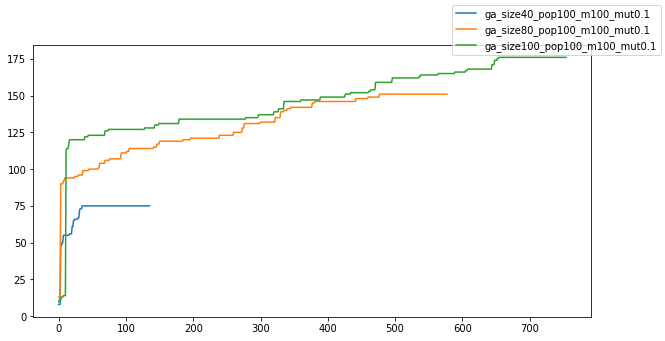

In [856]:
ga = Experiment.pickle_load(os.path.join(mlr_data, '4peaks','pickle_ga.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',100))
s.filters.append(TagFilter('mut',0.1))
s.filters.append(TagFilter('pop',100))
# s.filters.append(TagFilter('minelite',0))
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)
to_chart['ga'] = s.findall(ga)

mim_size40_pop200_m100_kp0.25|best_fit:75.0|best_it:17|time_to_best:5.33123|fevals_to_best:3830.0|fevals:23930.0
mim_size80_pop200_m100_kp0.25|best_fit:98.0|best_it:6|time_to_best:7.61086|fevals_to_best:1612.0|fevals:21712.0
mim_size100_pop200_m100_kp0.25|best_fit:127.0|best_it:23|time_to_best:43.75476|fevals_to_best:5032.0|fevals:25132.0


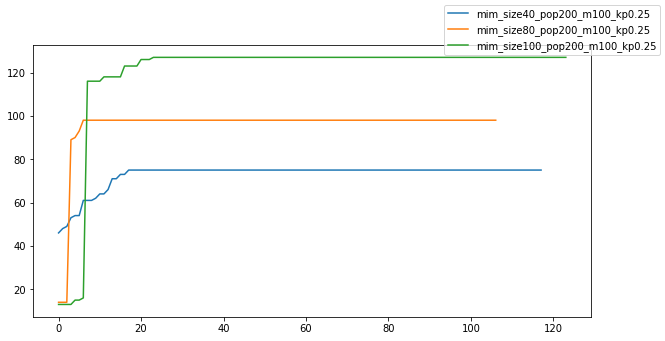

In [857]:
mim = Experiment.pickle_load(os.path.join(mlr_data, '4peaks','pickle_mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',100))
s.filters.append(TagFilter('pop',200))
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)
to_chart['mim'] = s.findall(mim)

rhc_size80_r20_m100|best_fit:25.0|best_it:345|time_to_best:1.13952|fevals_to_best:1979.0|fevals:2079.0
rhc_size100_r20_m100|best_fit:20.0|best_it:441|time_to_best:1.22624|fevals_to_best:640.0|fevals:740.0
rhc_size40_r20_m100|best_fit:75.0|best_it:469|time_to_best:4.26584|fevals_to_best:3224.0|fevals:3324.0


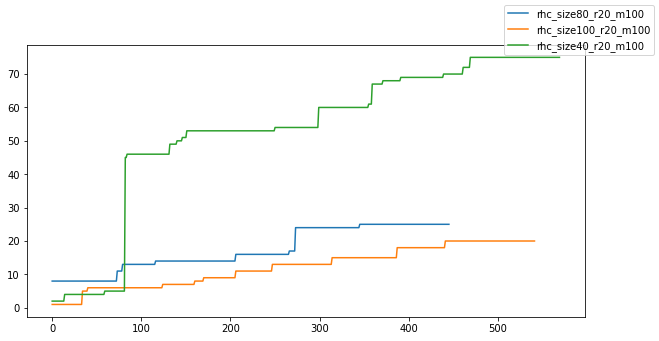

In [858]:
rhc = Experiment.pickle_load(os.path.join(mlr_data, '4peaks','pickle_rhc.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',100))
s.filters.append(TagFilter('r',20))
graph_generate_single(rhc, search=s)
table_summary_single(rhc, search=s)
to_chart['rhc'] = s.findall(rhc)

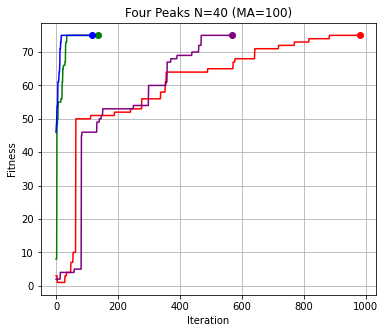

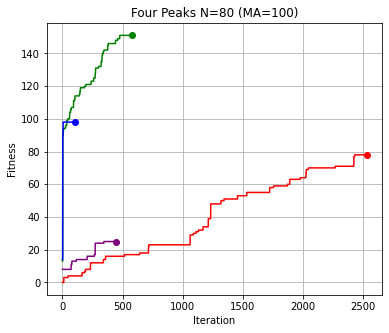

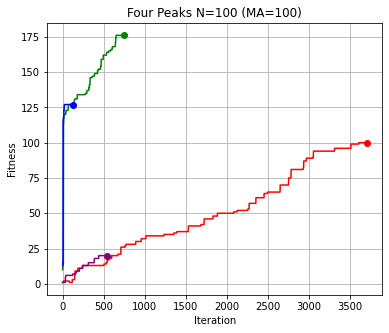

In [859]:
plt.rcParams["figure.figsize"] = (6,5)
for n in [40,80,100]:
    graph_generate_summary(to_chart, f'Four Peaks N={n} (MA=100)','Iteration','Fitness', size=n)


In [774]:
'''

███████╗██╗░░░░░██╗██████╗░███████╗██╗░░░░░░█████╗░██████╗░
██╔════╝██║░░░░░██║██╔══██╗██╔════╝██║░░░░░██╔══██╗██╔══██╗
█████╗░░██║░░░░░██║██████╔╝█████╗░░██║░░░░░██║░░██║██████╔╝
██╔══╝░░██║░░░░░██║██╔═══╝░██╔══╝░░██║░░░░░██║░░██║██╔═══╝░
██║░░░░░███████╗██║██║░░░░░██║░░░░░███████╗╚█████╔╝██║░░░░░
╚═╝░░░░░╚══════╝╚═╝╚═╝░░░░░╚═╝░░░░░╚══════╝░╚════╝░╚═╝░░░░░
'''

!ls $mlr_src/flipflop
!ls $mlr_data/flipflop
pickle='pickle_L'

__pycache__  run.py
pickle_Bsa.p  pickle_Lmim.p  pickle_Lsa.p  pickle_mim.p  pickle_sa.p
pickle_Lga.p  pickle_Lrhc.p  pickle_ga.p   pickle_rhc.p


sa_size32_schgeom_m1000|best_fit:31.0|best_it:896|time_to_best:0.23341|fevals_to_best:1021.0|fevals:2021.0
sa_size64_schgeom_m1000|best_fit:62.0|best_it:1210|time_to_best:1.42998|fevals_to_best:1438.0|fevals:10474.0
sa_size128_schgeom_m1000|best_fit:123.0|best_it:6219|time_to_best:7.36007|fevals_to_best:7141.0|fevals:11157.0

 [sa_size32_schgeom_m1000|best_fit:31.0|best_it:896|time_to_best:0.23341|fevals_to_best:1021.0|fevals:2021.0, sa_size64_schgeom_m1000|best_fit:62.0|best_it:1210|time_to_best:1.42998|fevals_to_best:1438.0|fevals:10474.0, sa_size128_schgeom_m1000|best_fit:123.0|best_it:6219|time_to_best:7.36007|fevals_to_best:7141.0|fevals:11157.0]


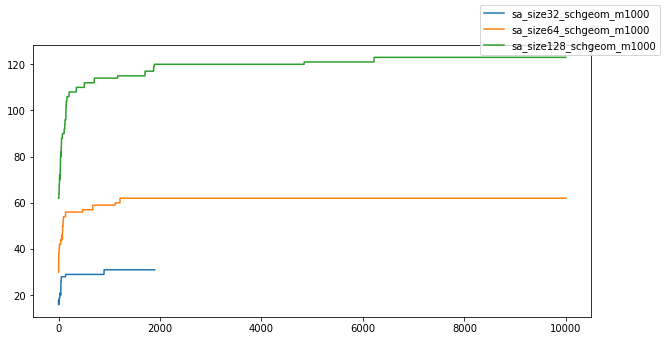

In [789]:
sa = Experiment.pickle_load(os.path.join(mlr_data, 'flipflop',pickle+'sa.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('m',10))
s.filters.append(TagFilter('sch','geom'))
graph_generate_single(sa, search=s)
# sa.results
table_summary_single(sa, search=s)
best = Search()
best.filters.append(TagFilter('sch','geom'))
# best.filters.append(TagFilter('m', 10))
# best.filters.append(TagFilter('size', ))
to_chart['sa'] = best.findall(sa)
print('\n',best.findall(sa))

ga_size32_pop200_m1000_mut0.1|best_fit:31.0|best_it:21|time_to_best:0.12037|fevals_to_best:31.0|fevals:1031.0
ga_size64_pop200_m1000_mut0.1|best_fit:61.0|best_it:45|time_to_best:0.27616|fevals_to_best:61.0|fevals:1061.0
ga_size128_pop200_m1000_mut0.1|best_fit:119.0|best_it:896|time_to_best:4.70703|fevals_to_best:926.0|fevals:1926.0

 [ga_size32_pop200_m1000_mut0.1|best_fit:31.0|best_it:21|time_to_best:0.12037|fevals_to_best:31.0|fevals:1031.0, ga_size64_pop200_m1000_mut0.1|best_fit:61.0|best_it:45|time_to_best:0.27616|fevals_to_best:61.0|fevals:1061.0, ga_size128_pop200_m1000_mut0.1|best_fit:119.0|best_it:896|time_to_best:4.70703|fevals_to_best:926.0|fevals:1926.0]


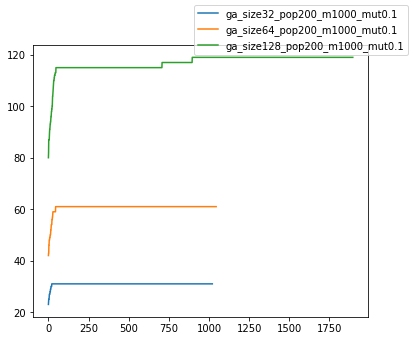

In [795]:
ga = Experiment.pickle_load(os.path.join(mlr_data, 'flipflop',pickle+'ga.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',32))
s.filters.append(TagFilter('mut',0.1))
s.filters.append(TagFilter('pop',200))
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)

best = Search()
best.filters.append(TagFilter('pop',200))
best.filters.append(TagFilter('mut', 0.1))

to_chart['ga'] = best.findall(ga)
print('\n',best.findall(ga))

mim_size32_pop200_m1000_kp0.25|best_fit:30.0|best_it:4|time_to_best:0.50349|fevals_to_best:10.0|fevals:1010.0
mim_size64_pop200_m1000_kp0.25|best_fit:56.0|best_it:8|time_to_best:3.90554|fevals_to_best:17.0|fevals:1017.0
mim_size128_pop200_m1000_kp0.25|best_fit:112.0|best_it:16|time_to_best:30.60661|fevals_to_best:29.0|fevals:1029.0

 [mim_size32_pop200_m1000_kp0.25|best_fit:30.0|best_it:4|time_to_best:0.50349|fevals_to_best:10.0|fevals:1010.0, mim_size64_pop200_m1000_kp0.25|best_fit:56.0|best_it:8|time_to_best:3.90554|fevals_to_best:17.0|fevals:1017.0, mim_size128_pop200_m1000_kp0.25|best_fit:112.0|best_it:16|time_to_best:30.60661|fevals_to_best:29.0|fevals:1029.0]


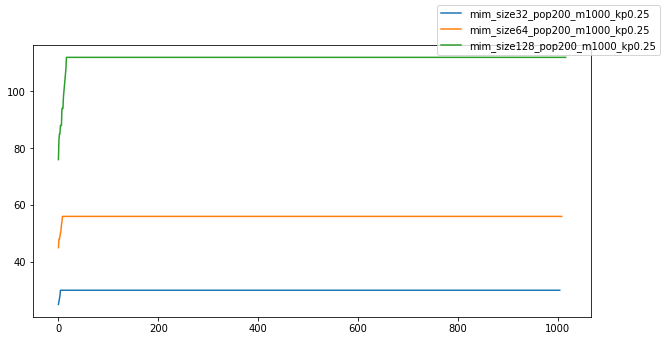

In [778]:
mim = Experiment.pickle_load(os.path.join(mlr_data, 'flipflop',pickle+'mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',128))
s.filters.append(TagFilter('pop',200))
s.filters.append(TagFilter('kp',.25))
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)

best = Search()
best.filters.append(TagFilter('pop',200))
best.filters.append(TagFilter('kp', 0.25))

to_chart['mim'] = best.findall(mim)
print('\n',best.findall(mim))


rhc_size32_r20_m1000|best_fit:29.0|best_it:93|time_to_best:3.92532|fevals_to_best:103.0|fevals:1103.0
rhc_size64_r20_m1000|best_fit:58.0|best_it:151|time_to_best:7.24084|fevals_to_best:14498.0|fevals:15498.0
rhc_size128_r20_m1000|best_fit:108.0|best_it:633|time_to_best:30.36323|fevals_to_best:20638.0|fevals:21638.0

 [rhc_size32_r20_m1000|best_fit:29.0|best_it:93|time_to_best:3.92532|fevals_to_best:103.0|fevals:1103.0, rhc_size64_r20_m1000|best_fit:58.0|best_it:151|time_to_best:7.24084|fevals_to_best:14498.0|fevals:15498.0, rhc_size128_r20_m1000|best_fit:108.0|best_it:633|time_to_best:30.36323|fevals_to_best:20638.0|fevals:21638.0]


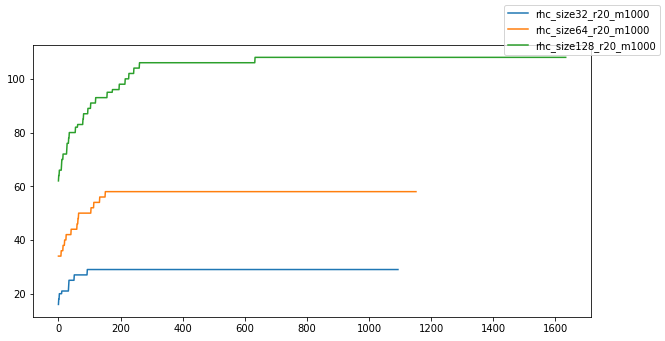

In [779]:
rhc = Experiment.pickle_load(os.path.join(mlr_data, 'flipflop',pickle+'rhc.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',128))
# s.filters.append(TagFilter('pop',200))
s.filters.append(TagFilter('r',20,'eq'))
graph_generate_single(rhc, search=s)
table_summary_single(rhc, search=s)

best = Search()
# best.filters.append(TagFilter('sch','geom'))
best.filters.append(TagFilter('r',20,'eq'))


to_chart['rhc'] = best.findall(rhc)
print('\n',best.findall(rhc))

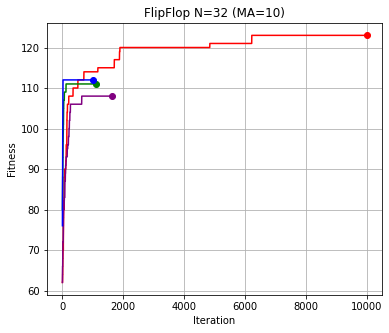

In [784]:
plt.rcParams["figure.figsize"] = (6,5)
    
graph_generate_summary(to_chart, 'FlipFlop N=32 (MA=10)','Iteration','Fitness', size=128)


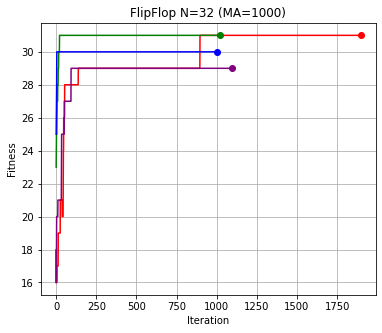

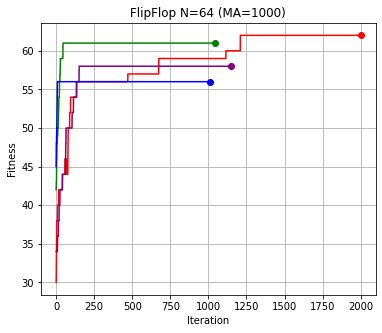

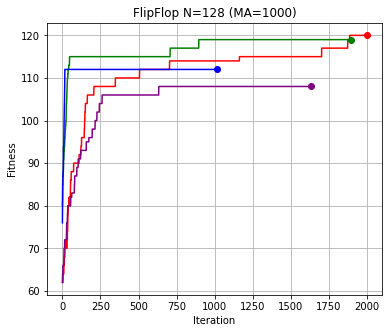

In [796]:
plt.rcParams["figure.figsize"] = (6,5)
for n in [32,64,128]:
    graph_generate_summary(to_chart, f'FlipFlop N={n} (MA=1000)','Iteration','Fitness', size=n, max_x=2000)

In [739]:
'''

░█████╗░░░░░░░██████╗░███████╗░█████╗░██╗░░██╗░██████╗
██╔══██╗░░░░░░██╔══██╗██╔════╝██╔══██╗██║░██╔╝██╔════╝
██║░░╚═╝█████╗██████╔╝█████╗░░███████║█████═╝░╚█████╗░
██║░░██╗╚════╝██╔═══╝░██╔══╝░░██╔══██║██╔═██╗░░╚═══██╗
╚█████╔╝░░░░░░██║░░░░░███████╗██║░░██║██║░╚██╗██████╔╝
░╚════╝░░░░░░░╚═╝░░░░░╚══════╝╚═╝░░╚═╝╚═╝░░╚═╝╚═════╝░
'''
exp='cpeaks'
!ls $mlr_data/$exp

pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p


sa_size32_schgeom_m10|best_fit:45.0|best_it:60|time_to_best:0.00127|fevals_to_best:98.0|fevals:112.0
sa_size64_schgeom_m10|best_fit:106.0|best_it:726|time_to_best:0.09925|fevals_to_best:1133.0|fevals:1185.0
sa_size128_schgeom_m10|best_fit:194.0|best_it:1502|time_to_best:0.20752|fevals_to_best:2528.0|fevals:2543.0


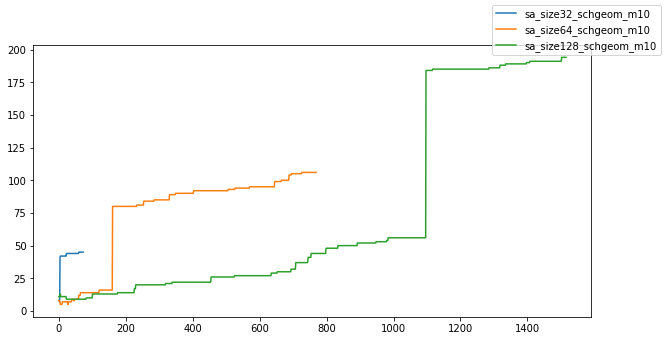

In [740]:
sa = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_sa.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',32))
s.filters.append(TagFilter('sch','geom'))
graph_generate_single(sa, search=s)
# sa.results
table_summary_single(sa, search=s)

ga_size32_pop200_m10_mut0.2|best_fit:54.0|best_it:22|time_to_best:0.15923|fevals_to_best:4828.0|fevals:6838.0
ga_size64_pop200_m10_mut0.2|best_fit:117.0|best_it:101|time_to_best:0.49889|fevals_to_best:20728.0|fevals:22738.0
ga_size128_pop200_m10_mut0.2|best_fit:176.0|best_it:85|time_to_best:0.54984|fevals_to_best:17504.0|fevals:19514.0


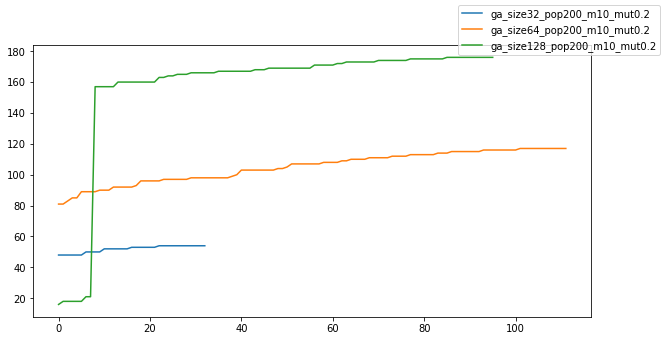

In [741]:
ga = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_ga.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',128))
s.filters.append(TagFilter('mut',0.2))
s.filters.append(TagFilter('pop',200))
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)

mim_size5_pop200_m10_kp0.25|best_fit:210.0|best_it:4|time_to_best:0.1393|fevals_to_best:1209.0|fevals:3219.0
mim_size10_pop200_m10_kp0.25|best_fit:433.0|best_it:3|time_to_best:0.12319|fevals_to_best:1008.0|fevals:3018.0
mim_size15_pop200_m10_kp0.25|best_fit:657.0|best_it:3|time_to_best:0.11891|fevals_to_best:1008.0|fevals:3018.0
mim_size25_pop200_m10_kp0.25|best_fit:1094.0|best_it:3|time_to_best:0.13774|fevals_to_best:1008.0|fevals:3018.0
mim_size5_pop200_m100_kp0.25|best_fit:210.0|best_it:4|time_to_best:0.09976|fevals_to_best:1209.0|fevals:21309.0
mim_size10_pop200_m100_kp0.25|best_fit:433.0|best_it:3|time_to_best:0.08296|fevals_to_best:1008.0|fevals:21108.0
mim_size15_pop200_m100_kp0.25|best_fit:657.0|best_it:3|time_to_best:0.08119|fevals_to_best:1008.0|fevals:21108.0
mim_size25_pop200_m100_kp0.25|best_fit:1094.0|best_it:3|time_to_best:0.09104|fevals_to_best:1008.0|fevals:21108.0
mim_size5_pop200_m1000_kp0.25|best_fit:210.0|best_it:4|time_to_best:0.05965|fevals_to_best:1209.0|fevals:

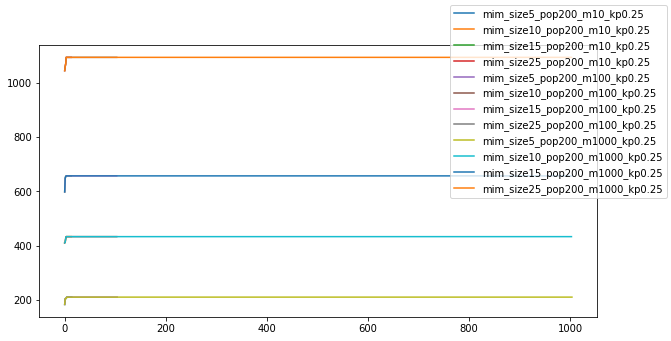

In [738]:
mim = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',160))
# s.filters.append(TagFilter('pop',100))
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)

In [809]:
'''

██╗░░██╗███╗░░██╗░█████╗░██████╗░░██████╗░█████╗░░█████╗░██╗░░██╗
██║░██╔╝████╗░██║██╔══██╗██╔══██╗██╔════╝██╔══██╗██╔══██╗██║░██╔╝
█████═╝░██╔██╗██║███████║██████╔╝╚█████╗░███████║██║░░╚═╝█████═╝░
██╔═██╗░██║╚████║██╔══██║██╔═══╝░░╚═══██╗██╔══██║██║░░██╗██╔═██╗░
██║░╚██╗██║░╚███║██║░░██║██║░░░░░██████╔╝██║░░██║╚█████╔╝██║░╚██╗
╚═╝░░╚═╝╚═╝░░╚══╝╚═╝░░╚═╝╚═╝░░░░░╚═════╝░╚═╝░░╚═╝░╚════╝░╚═╝░░╚═╝
'''

exp='knapsack'
pickle='pickle_2'

sa_size5_schgeom_m1000|best_fit:188.0|best_it:7|time_to_best:0.0011|fevals_to_best:10.0|fevals:1010.0
sa_size10_schgeom_m1000|best_fit:620.0|best_it:32|time_to_best:0.00566|fevals_to_best:41.0|fevals:1041.0
sa_size15_schgeom_m1000|best_fit:1441.0|best_it:233|time_to_best:0.06127|fevals_to_best:253.0|fevals:1253.0
sa_size25_schgeom_m1000|best_fit:3868.0|best_it:509|time_to_best:0.15842|fevals_to_best:549.0|fevals:1549.0


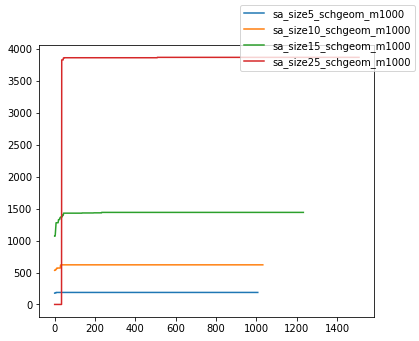

In [819]:
sa = Experiment.pickle_load(os.path.join(mlr_data, exp ,pickle+'sa.p'))
#graph it. 
s = Search()
s.filters.append(TagFilter('m',1000))
s.filters.append(TagFilter('sch','geom'))
graph_generate_single(sa, search=s)
# sa.results
table_summary_single(sa, search=s)

best = Search()
best.filters.append(TagFilter('sch','geom'))
best.filters.append(TagFilter('m', 1000))
# best.filters.append(TagFilter('size', ))
to_chart['sa'] = best.findall(sa)


ga_size5_pop200_m1000_mut0.1|best_fit:211.0|best_it:13|time_to_best:0.08841|fevals_to_best:3020.0|fevals:204020.0
ga_size10_pop200_m1000_mut0.1|best_fit:889.0|best_it:60|time_to_best:0.44113|fevals_to_best:12479.0|fevals:213479.0
ga_size15_pop200_m1000_mut0.1|best_fit:1899.0|best_it:93|time_to_best:0.72727|fevals_to_best:19136.0|fevals:220136.0
ga_size25_pop200_m1000_mut0.1|best_fit:5932.0|best_it:349|time_to_best:1.84196|fevals_to_best:70611.0|fevals:271611.0


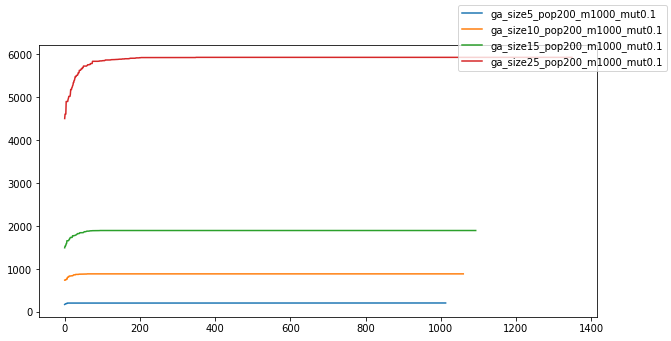

In [811]:
ga = Experiment.pickle_load(os.path.join(mlr_data, exp,pickle+'ga.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',15))
s.filters.append(TagFilter('mut',0.1))
s.filters.append(TagFilter('m', 1000))
s.filters.append(TagFilter('pop',200))
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)

best = Search()
# best.filters.append(TagFilter('size',15))
best.filters.append(TagFilter('mut',0.1))
best.filters.append(TagFilter('pop',200))
best.filters.append(TagFilter('m', 1000))
# best.filters.append(TagFilter('size', ))
to_chart['ga'] = best.findall(ga)

mim_size5_pop200_m1000_kp0.25|best_fit:210.0|best_it:4|time_to_best:0.08821|fevals_to_best:1209.0|fevals:202209.0
mim_size10_pop200_m1000_kp0.25|best_fit:845.0|best_it:11|time_to_best:0.66303|fevals_to_best:2621.0|fevals:203621.0
mim_size15_pop200_m1000_kp0.25|best_fit:1737.0|best_it:14|time_to_best:1.68534|fevals_to_best:3226.0|fevals:204226.0
mim_size25_pop200_m1000_kp0.25|best_fit:5197.0|best_it:13|time_to_best:4.08633|fevals_to_best:3026.0|fevals:204026.0


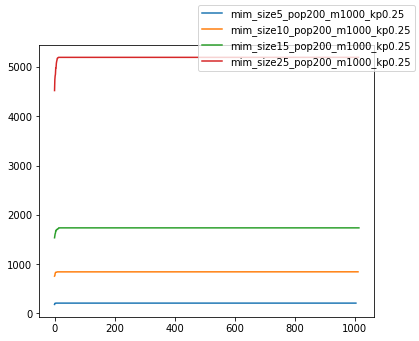

In [821]:
mim = Experiment.pickle_load(os.path.join(mlr_data, exp,pickle+'mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',15))
s.filters.append(TagFilter('m',1000))
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)

best = Search()

best.filters.append(TagFilter('m', 1000))
# best.filters.append(TagFilter('size', ))
to_chart['mim'] = best.findall(mim)

rhc_size5_r10_m1000|best_fit:208.0|best_it:59|time_to_best:0.9006|fevals_to_best:3123.0|fevals:4123.0
rhc_size10_r10_m1000|best_fit:783.0|best_it:54|time_to_best:1.02349|fevals_to_best:3606.0|fevals:4606.0
rhc_size15_r10_m1000|best_fit:1598.0|best_it:101|time_to_best:2.71171|fevals_to_best:11585.0|fevals:12585.0
rhc_size25_r10_m1000|best_fit:4669.0|best_it:293|time_to_best:4.63091|fevals_to_best:7704.0|fevals:8704.0


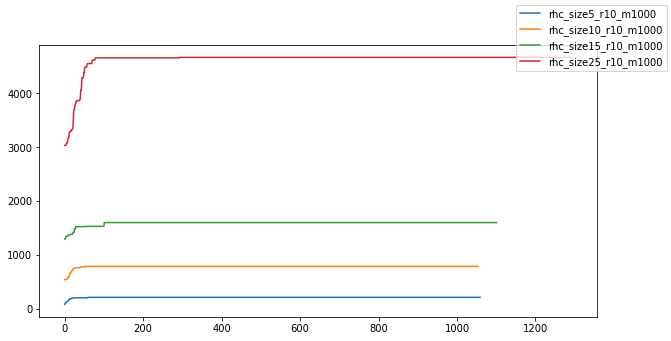

In [813]:
rhc = Experiment.pickle_load(os.path.join(mlr_data, exp,pickle+'rhc.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',15))
s.filters.append(TagFilter('r',10))
s.filters.append(TagFilter('m',1000))
# s.filters.append(TagFilter('pop',100))
graph_generate_single(rhc, search=s)
table_summary_single(rhc, search=s)

best = Search()
best.filters.append(TagFilter('r',10))
best.filters.append(TagFilter('m', 1000))
# best.filters.append(TagFilter('size', ))
to_chart['rhc'] = best.findall(rhc)

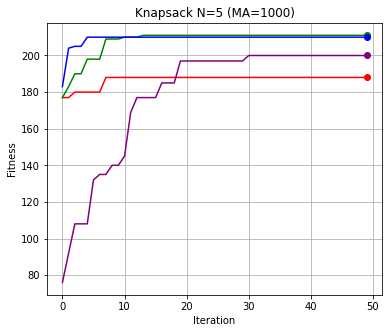

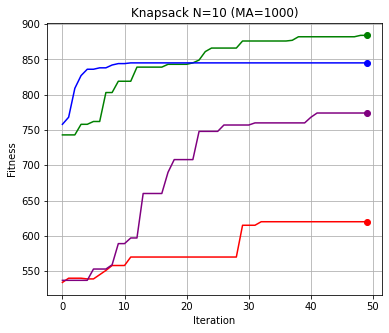

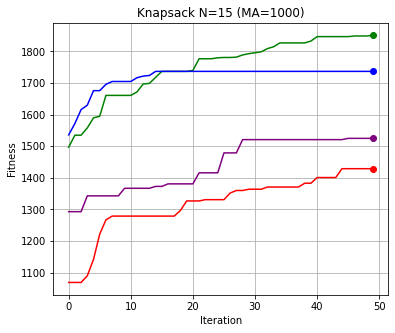

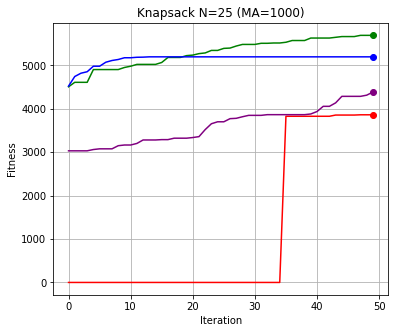

In [820]:
plt.rcParams["figure.figsize"] = (6,5)
for n in [5,10,15, 25]:
    graph_generate_summary(to_chart, f'Knapsack N={n} (MA=1000)','Iteration','Fitness', size=n, max_x=50)

[5, 10, 15, 25]
{'sa': {}, 'ga': {}, 'rhc': {}, 'mim': {}}


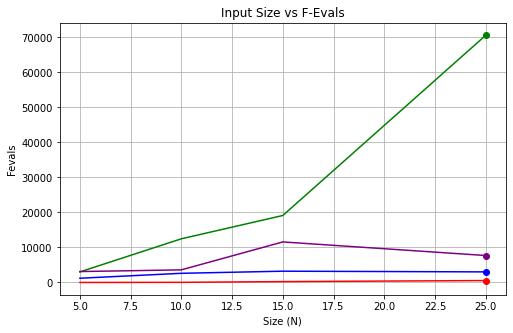

In [852]:

graph_generate_input_to_fevals(to_chart,'Input Size vs F-Evals','Size (N)','Fevals')